# LAMA: LightAutoML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Развернем библиотеку lightautoml

In [ ]:
!pip install -U lightautoml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.4/416.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 976.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 76.8 MB/s eta 0:00:00
   

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
import torch

# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn. metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from xgboost import XGBClassifier

In [ ]:
# для воспроизводимости результатов зафиксируем сид
random_state = 42
n_threads = 4 # число потоков, которые будут обрабатывать данные
np.random.seed(random_state)
torch.set_num_threads(n_threads)

## Load Dataset

In [ ]:
data_n = pd.read_excel('/content/drive/MyDrive/Datasets/train.xlsx')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/onlinetours_ru_train_data_data_engineering.csv')

In [ ]:
data

,Стоимость,Внесена предоплата,Способ оплаты,день_бронирования,дата_отмены,дата_заезда,дата_выезда,Гостей,Гостиница
0,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
1,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
2,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
3,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
4,118500.0,59250.0,Visa,2014-05-16,0,2014-07-01,2014-07-10,4,Cesars Resort
...,...,...,...,...,...,...,...,...,...
79532,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79533,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79534,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето
79535,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето


In [ ]:
data_n

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26170,26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Активный,Номер «Студия»,3,4
26171,26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26172,26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Отмена,Номер «Стандарт»,2,3


In [ ]:
data_n = data_n.drop(columns=['Unnamed: 0', 'Статус брони'])
data_n = data_n.drop(columns=['№ брони', 'Номеров', 'Ночей', 'Источник', 'Категория номера'])

In [ ]:
data_n

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Выезд,Гостей,Гостиница
0,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,2023-05-01 12:00:00,2,1
1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2022-07-13 12:00:00,2,1
2,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2022-12-06 12:00:00,2,4
3,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,2023-09-19 12:00:00,1,3
4,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2023-05-31 12:00:00,4,1
...,...,...,...,...,...,...,...,...,...
26169,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2023-03-12 12:00:00,2,2
26170,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,2023-06-28 12:00:00,3,4
26171,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,2022-06-28 12:00:00,2,2
26172,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,2022-04-28 12:00:00,2,3


In [ ]:
data

,Стоимость,Внесена предоплата,Способ оплаты,день_бронирования,дата_отмены,дата_заезда,дата_выезда,Гостей,Гостиница
0,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
1,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
2,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
3,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
4,118500.0,59250.0,Visa,2014-05-16,0,2014-07-01,2014-07-10,4,Cesars Resort
...,...,...,...,...,...,...,...,...,...
79532,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79533,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79534,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето
79535,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето


In [ ]:
# Переименование колонок
data = data.rename(columns={
    'день_бронирования': 'Дата бронирования',
    'дата_заезда': 'Заезд',
    'дата_выезда': 'Выезд',
    'дата_отмены': 'Отмена'
})

In [ ]:
data

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Отмена,Заезд,Выезд,Гостей,Гостиница
0,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
1,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
2,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
3,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
4,118500.0,59250.0,Visa,2014-05-16,0,2014-07-01,2014-07-10,4,Cesars Resort
...,...,...,...,...,...,...,...,...,...
79532,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79533,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79534,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето
79535,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79537 entries, 0 to 79536
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Стоимость           79537 non-null  float64
 1   Внесена предоплата  79537 non-null  float64
 2   Способ оплаты       79537 non-null  object 
 3   Дата бронирования   79537 non-null  object 
 4   Отмена              79537 non-null  int64  
 5   Заезд               79502 non-null  object 
 6   Выезд               79469 non-null  object 
 7   Гостей              79537 non-null  int64  
 8   Гостиница           79414 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ MB


In [ ]:
data.describe()

,Стоимость,Внесена предоплата,Отмена,Гостей
count,7.953700e+04,7.953700e+04,79537.000000,79537.00000
mean,6.042285e+04,2.927642e+04,0.024944,2.43972
std,8.647014e+04,4.382564e+04,0.155957,1.23066
min,-3.580800e+04,0.000000e+00,0.000000,0.00000
25%,1.154600e+04,0.000000e+00,0.000000,2.00000
50%,3.832500e+04,1.916250e+04,0.000000,2.00000
75%,7.928600e+04,3.964300e+04,0.000000,3.00000
max,8.100238e+06,4.050119e+06,1.000000,100.00000


In [ ]:
data = data.dropna()

In [ ]:
data

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Отмена,Заезд,Выезд,Гостей,Гостиница
0,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
1,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
2,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
3,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
4,118500.0,59250.0,Visa,2014-05-16,0,2014-07-01,2014-07-10,4,Cesars Resort
...,...,...,...,...,...,...,...,...,...
79532,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79533,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79534,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето
79535,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79355 entries, 0 to 79536
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Стоимость           79355 non-null  float64
 1   Внесена предоплата  79355 non-null  float64
 2   Способ оплаты       79355 non-null  object 
 3   Дата бронирования   79355 non-null  object 
 4   Отмена              79355 non-null  int64  
 5   Заезд               79355 non-null  object 
 6   Выезд               79355 non-null  object 
 7   Гостей              79355 non-null  int64  
 8   Гостиница           79355 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 8.1+ MB


In [ ]:
# Создание нового столбца "Отмена" (0 или 1)
data_n['Отмена'] = data_n['Дата отмены'].notna().astype(int)

In [ ]:
data

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Отмена,Заезд,Выезд,Гостей,Гостиница
0,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
1,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
2,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
3,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
4,118500.0,59250.0,Visa,2014-05-16,0,2014-07-01,2014-07-10,4,Cesars Resort
...,...,...,...,...,...,...,...,...,...
79532,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79533,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79534,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето
79535,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето


In [ ]:
data_n = data_n.drop(columns=['Дата отмены'])

In [ ]:
data

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Отмена,Заезд,Выезд,Гостей,Гостиница
0,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
1,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
2,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
3,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
4,118500.0,59250.0,Visa,2014-05-16,0,2014-07-01,2014-07-10,4,Cesars Resort
...,...,...,...,...,...,...,...,...,...
79532,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79533,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79534,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето
79535,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето


In [ ]:
data_n

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Выезд,Гостей,Гостиница,Отмена
0,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-28 15:00:00,2023-05-01 12:00:00,2,1,1
1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,2022-07-11 15:00:00,2022-07-13 12:00:00,2,1,0
2,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,2022-12-04 15:00:00,2022-12-06 12:00:00,2,4,0
3,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,2023-09-18 15:00:00,2023-09-19 12:00:00,1,3,0
4,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,2023-05-29 15:00:00,2023-05-31 12:00:00,4,1,0
...,...,...,...,...,...,...,...,...,...
26169,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,2023-03-10 15:00:00,2023-03-12 12:00:00,2,2,0
26170,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,2023-06-25 15:00:00,2023-06-28 12:00:00,3,4,0
26171,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,2022-06-24 15:00:00,2022-06-28 12:00:00,2,2,0
26172,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-27 15:00:00,2022-04-28 12:00:00,2,3,1


In [ ]:
data_n['Дата бронирования'] = data_n['Дата бронирования'].dt.date.astype(str)
data_n['Заезд'] = data_n['Заезд'].dt.date.astype(str)
data_n['Выезд'] = data_n['Выезд'].dt.date.astype(str)

In [ ]:
# Определить столбцы для кодирования
encode_cols = [col for col in data_n.columns if data_n[col].dtype == 'object']

# Кодирование остальных столбцов с типом object
for col in encode_cols:
    le = LabelEncoder()
    data_n[col] = le.fit_transform(data_n[col])

In [ ]:
data_n

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Выезд,Гостей,Гостиница,Отмена
0,25700.0,0,6,474,481,483,2,1,1
1,24800.0,12400,11,168,190,191,2,1,0
2,25800.0,12900,4,317,336,337,2,4,0
3,10500.0,0,9,615,624,624,1,3,0
4,28690.0,28690,13,504,512,513,4,1,0
...,...,...,...,...,...,...,...,...,...
26169,18240.0,9120,4,371,432,433,2,2,0
26170,69600.0,23200,4,535,539,541,3,4,0
26171,55600.0,13900,4,127,173,176,2,2,0
26172,6300.0,0,10,49,115,115,2,3,1


In [ ]:
data

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Отмена,Заезд,Выезд,Гостей,Гостиница
0,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
1,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
2,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
3,83520.0,41760.0,Visa,2014-05-03,0,2014-06-24,2014-07-03,4,"Sheraton Sharm Hotel, Resort, Villas & Spa"
4,118500.0,59250.0,Visa,2014-05-16,0,2014-07-01,2014-07-10,4,Cesars Resort
...,...,...,...,...,...,...,...,...,...
79532,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79533,104039.0,52019.5,Visa,2021-05-30,0,2021-06-30,2021-07-09,2,El Borj
79534,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето
79535,1281.0,0.0,Visa,2021-05-30,0,2021-05-31,2021-06-03,2,Лето


In [ ]:
# Определить столбцы для кодирования
encode_cols = [col for col in data.columns if data[col].dtype == 'object']

# Кодирование остальных столбцов с типом object
for col in encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

<ipython-input-135-690a913e059b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-135-690a913e059b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-135-690a913e059b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
data

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Отмена,Заезд,Выезд,Гостей,Гостиница
0,83520.0,41760.0,0,5,0,9,9,4,3165
1,83520.0,41760.0,0,5,0,9,9,4,3165
2,83520.0,41760.0,0,5,0,9,9,4,3165
3,83520.0,41760.0,0,5,0,9,9,4,3165
4,118500.0,59250.0,0,6,0,10,10,4,705
...,...,...,...,...,...,...,...,...,...
79532,104039.0,52019.5,0,1398,0,1415,1410,2,1026
79533,104039.0,52019.5,0,1398,0,1415,1410,2,1026
79534,1281.0,0.0,0,1398,0,1385,1374,2,4226
79535,1281.0,0.0,0,1398,0,1385,1374,2,4226


In [ ]:
column_order = [col for col in data.columns if col != 'Отмена'] + ['Отмена']
data = data[column_order]

In [ ]:
data

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Выезд,Гостей,Гостиница,Отмена
0,83520.0,41760.0,0,5,9,9,4,3165,0
1,83520.0,41760.0,0,5,9,9,4,3165,0
2,83520.0,41760.0,0,5,9,9,4,3165,0
3,83520.0,41760.0,0,5,9,9,4,3165,0
4,118500.0,59250.0,0,6,10,10,4,705,0
...,...,...,...,...,...,...,...,...,...
79532,104039.0,52019.5,0,1398,1415,1410,2,1026,0
79533,104039.0,52019.5,0,1398,1415,1410,2,1026,0
79534,1281.0,0.0,0,1398,1385,1374,2,4226,0
79535,1281.0,0.0,0,1398,1385,1374,2,4226,0


In [ ]:
data_n

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Выезд,Гостей,Гостиница,Отмена
0,25700.0,0,6,474,481,483,2,1,1
1,24800.0,12400,11,168,190,191,2,1,0
2,25800.0,12900,4,317,336,337,2,4,0
3,10500.0,0,9,615,624,624,1,3,0
4,28690.0,28690,13,504,512,513,4,1,0
...,...,...,...,...,...,...,...,...,...
26169,18240.0,9120,4,371,432,433,2,2,0
26170,69600.0,23200,4,535,539,541,3,4,0
26171,55600.0,13900,4,127,173,176,2,2,0
26172,6300.0,0,10,49,115,115,2,3,1


In [ ]:
data = pd.concat([data, data_n], ignore_index=True)

In [ ]:
data

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Выезд,Гостей,Гостиница,Отмена
0,83520.0,41760.0,0,5,9,9,4,3165,0
1,83520.0,41760.0,0,5,9,9,4,3165,0
2,83520.0,41760.0,0,5,9,9,4,3165,0
3,83520.0,41760.0,0,5,9,9,4,3165,0
4,118500.0,59250.0,0,6,10,10,4,705,0
...,...,...,...,...,...,...,...,...,...
105524,18240.0,9120.0,4,371,432,433,2,2,0
105525,69600.0,23200.0,4,535,539,541,3,4,0
105526,55600.0,13900.0,4,127,173,176,2,2,0
105527,6300.0,0.0,10,49,115,115,2,3,1


<ipython-input-19-b6dbb930b819>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_methods.values, y=payment_methods.index, palette=palette)


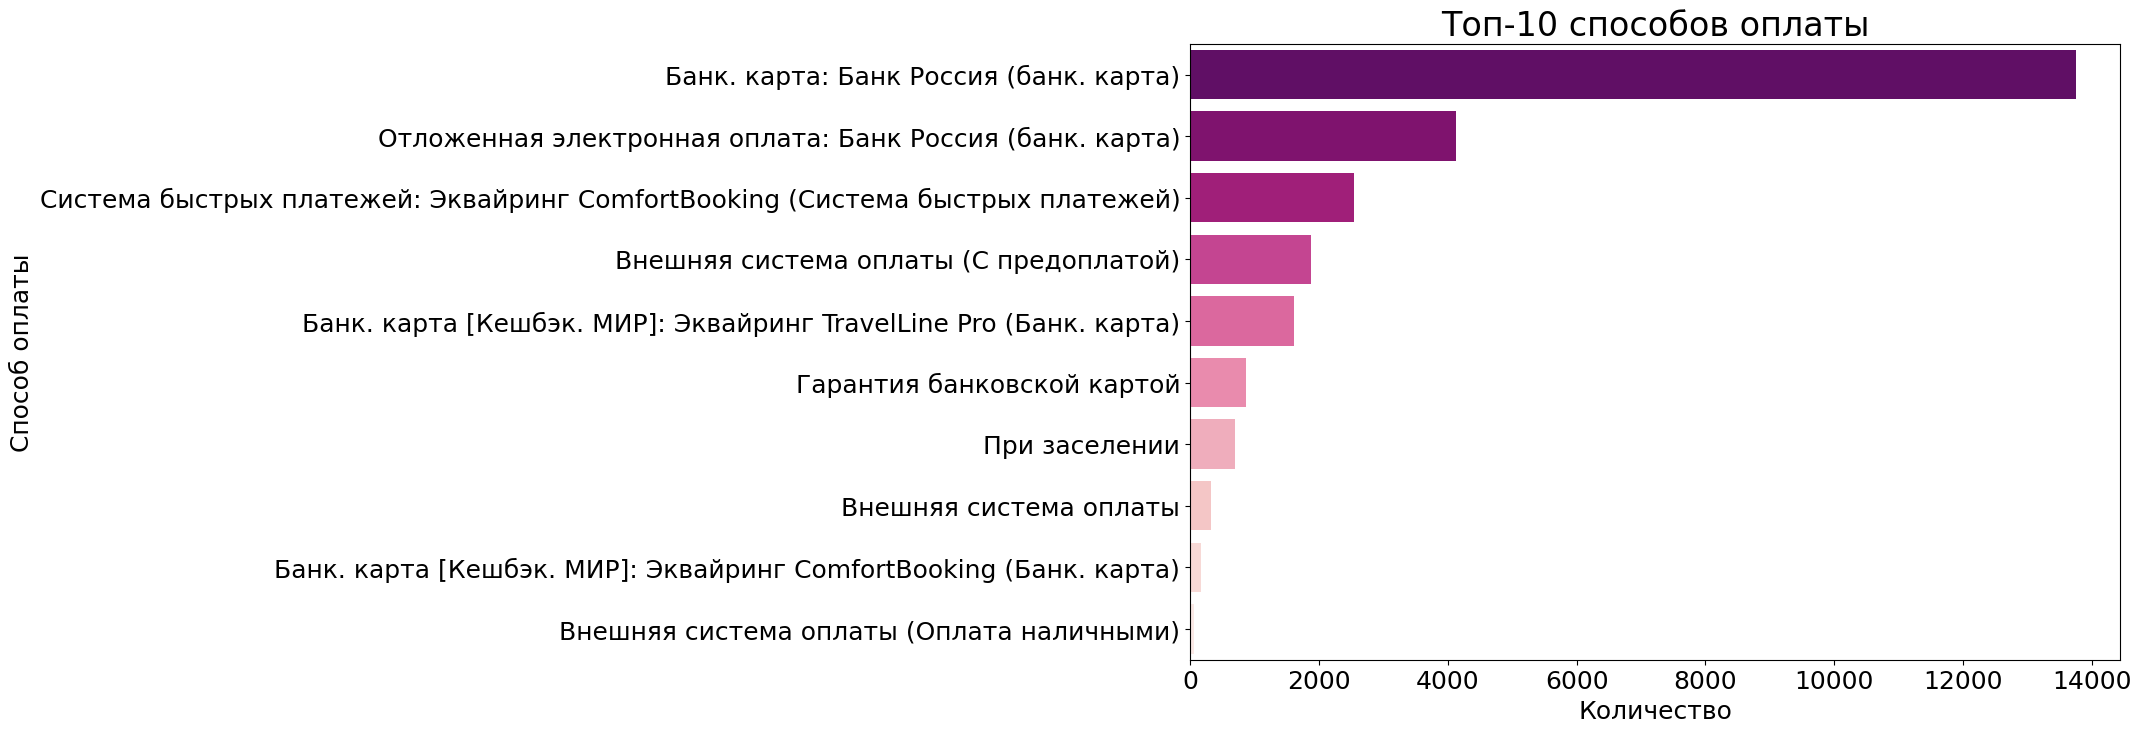

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагая, что 'data' — это ваш DataFrame
payment_methods = data['Способ оплаты'].value_counts().head(10)

# Сортировка по убыванию
payment_methods = payment_methods.sort_values(ascending=False)

# Создание цветовой палитры и инверсия её порядка
palette = sns.color_palette("RdPu", len(payment_methods))[::-1]  # Инвертирование палитры

# Создание горизонтальной столбчатой диаграммы
plt.figure(figsize=(12, 8))
sns.barplot(x=payment_methods.values, y=payment_methods.index, palette=palette)

# Установка заголовка и параметров осей с более крупным шрифтом
plt.title('Топ-10 способов оплаты', fontsize=24, color='black')
plt.xlabel('Количество', fontsize=18)
plt.ylabel('Способ оплаты', fontsize=18)

# Настройка шрифта для меток осей
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Показать диаграмму
plt.show()


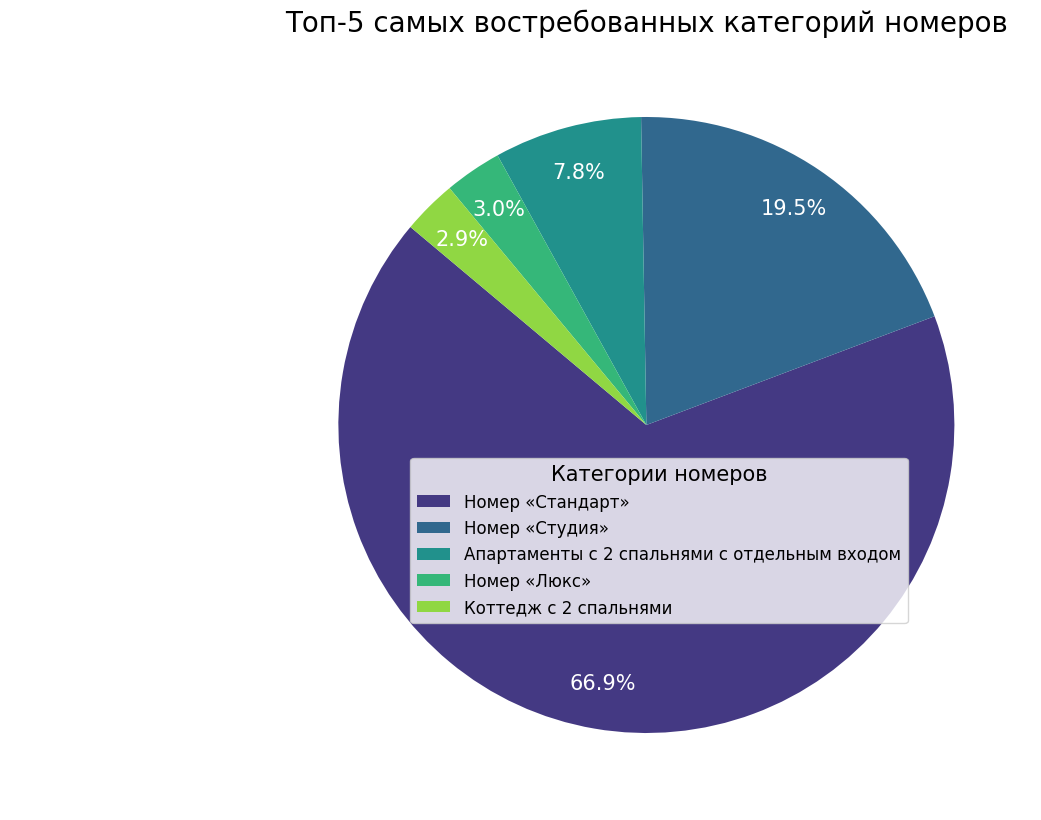

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
room_types = data['Категория номера'].value_counts().head(5)

# Create a color palette
palette = sns.color_palette("viridis", len(room_types))

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(room_types, labels=room_types.index, colors=palette, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 15, 'color': 'white'}, pctdistance=0.85)

# Set title with increased font size and black color
plt.title('Топ-5 самых востребованных категорий номеров', fontsize=20, color='black')

# Set the color of the legend text to black and position it to the right of the chart with a margin
plt.legend(title='Категории номеров', title_fontsize=15, loc='center right', fontsize=12, labelcolor='black', bbox_to_anchor=(0.85, 0.35))

# Show the plot
plt.show()


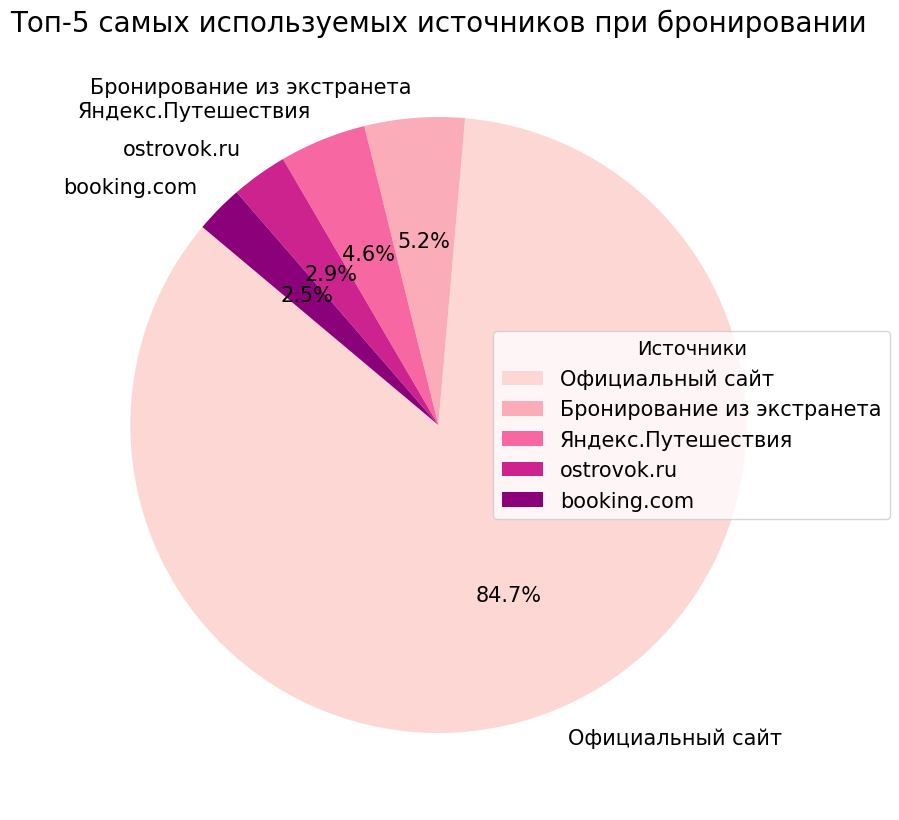

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
room_types = data['Источник'].value_counts().head(5)

# Create a color palette
palette = sns.color_palette("RdPu", len(room_types))

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(room_types, labels=room_types.index, colors=palette, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 15, 'color': 'black'})

# Set title with increased font size and black color
plt.title('Топ-5 самых используемых источников при бронировании', fontsize=20, color='black')

# Set the color of the legend text to black and position it to the right of the chart with a margin
plt.legend(title='Источники', title_fontsize=14, loc='center right', fontsize=15, labelcolor='black', bbox_to_anchor=(1.1, 0.5))

# Show the plot
plt.show()


In [ ]:
# Определить столбцы для кодирования
encode_cols = [col for col in data.columns if data[col].dtype == 'object']

# Кодирование остальных столбцов с типом object
for col in encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

<ipython-input-64-690a913e059b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-64-690a913e059b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-64-690a913e059b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [ ]:
data

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Отмена,Заезд,Выезд,Гостей,Гостиница
0,83520.0,41760.0,0,5,0,9,9,4,3165
1,83520.0,41760.0,0,5,0,9,9,4,3165
2,83520.0,41760.0,0,5,0,9,9,4,3165
3,83520.0,41760.0,0,5,0,9,9,4,3165
4,118500.0,59250.0,0,6,0,10,10,4,705
...,...,...,...,...,...,...,...,...,...
79532,104039.0,52019.5,0,1398,0,1415,1410,2,1026
79533,104039.0,52019.5,0,1398,0,1415,1410,2,1026
79534,1281.0,0.0,0,1398,0,1385,1374,2,4226
79535,1281.0,0.0,0,1398,0,1385,1374,2,4226


# Создание и обучение пресета TabularAutoML

In [ ]:
train_data, test_data = train_test_split(
    data,
    test_size = 0.33,
    random_state = random_state)

train_data

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Выезд,Гостей,Гостиница,Отмена
58044,13247.0,0.0,0,1278,1279,1268,3,4642,0
22904,86960.0,43480.0,0,1073,1124,1128,2,4097,0
88532,37300.0,37300.0,13,562,561,563,2,1,0
67671,463000.0,231500.0,0,1335,1390,1386,9,501,0
34896,62500.0,31250.0,0,1148,1136,1128,3,1843,0
...,...,...,...,...,...,...,...,...,...
54886,2091.0,0.0,0,1257,1267,1256,3,4523,0
76820,10585.0,0.0,0,1378,1369,1359,1,4302,0
103694,15900.0,0.0,10,53,52,52,2,1,1
860,183015.0,91507.5,0,309,324,333,3,3448,0


In [ ]:
test_data

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Выезд,Гостей,Гостиница,Отмена
87903,11000.0,11000.0,4,288,289,289,1,2,0
80335,12000.0,14100.0,4,92,92,92,3,1,0
9072,119707.0,59853.5,0,922,912,909,2,1791,0
17555,23529.0,11764.5,0,964,931,924,1,3385,0
77433,14561.0,0.0,0,1382,1386,1376,4,4035,0
...,...,...,...,...,...,...,...,...,...
103639,32800.0,32800.0,4,237,250,251,2,2,0
24202,489708.0,244854.0,0,1338,1418,1418,2,2214,0
9053,103163.0,51581.5,0,922,941,938,4,745,0
65751,40625.0,20312.5,0,1325,1327,1320,2,4523,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from autogluon.tabular import TabularPredictor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Загрузка данных
train_df = pd.read_excel('/content/drive/MyDrive/Datasets/train.xlsx')
test_df = pd.read_excel('/content/drive/MyDrive/Datasets/test.xlsx')

# Предобработка данных
def date_to_features(df):
    df['Дата бронирования'] = pd.to_datetime(df['Дата бронирования'])
    df['Заезд'] = pd.to_datetime(df['Заезд'])
    df['Выезд'] = pd.to_datetime(df['Выезд'])

    df['день_бронирования'] = df['Дата бронирования'].dt.day
    df['месяц_бронирования'] = df['Дата бронирования'].dt.month
    df['год_бронирования'] = df['Дата бронирования'].dt.year
    df['день_заезда'] = df['Заезд'].dt.day
    df['месяц_заезда'] = df['Заезд'].dt.month
    df['год_заезда'] = df['Заезд'].dt.year
    df['день_выезда'] = df['Выезд'].dt.day
    df['месяц_выезда'] = df['Выезд'].dt.month
    df['год_выезда'] = df['Выезд'].dt.year
    df['разница_заезда'] = (df['Заезд'] - df['Дата бронирования']).dt.days

    df['сезон_бронирования'] = df['месяц_бронирования'].apply(lambda x: (x % 12 + 3) // 3)
    df['день_недели_бронирования'] = df['Дата бронирования'].dt.weekday
    df['день_недели_заезда'] = df['Заезд'].dt.weekday
    df['длительность_пребывания'] = (df['Выезд'] - df['Заезд']).dt.days
    return df

train_df = date_to_features(train_df)
test_df = date_to_features(test_df)

# Подготовка признаков и целевой переменной
features = ['Номеров', 'Стоимость', 'Внесена предоплата', 'Способ оплаты',
            'день_бронирования', 'месяц_бронирования', 'год_бронирования',
            'день_заезда', 'месяц_заезда', 'год_заезда',
            'день_выезда', 'месяц_выезда', 'год_выезда',
            'Гостей', 'Гостиница', 'разница_заезда', 'сезон_бронирования',
            'день_недели_бронирования', 'день_недели_заезда', 'длительность_пребывания']
target = 'Дата отмены'

train_df['target'] = train_df[target].notnull().astype(int)

X = train_df[features]
y = train_df['target']

# Преобразование категориальных переменных
categorical_features = ['Способ оплаты', 'Гостиница']
numeric_features = list(set(features) - set(categorical_features))

# Pipeline для обработки категориальных и числовых признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Преобразование данных
X_transformed = preprocessor.fit_transform(X)

# Балансировка классов с использованием SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_transformed, y)

# Преобразование сбалансированных данных в DataFrame
X_balanced = pd.DataFrame(X_balanced, columns=preprocessor.get_feature_names_out())

# Объединение сбалансированных данных в один DataFrame
data_balanced = X_balanced.copy()
data_balanced['target'] = y_balanced

In [ ]:
!pip install autogluon.tabular
from autogluon.tabular import TabularPredictor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully u

In [ ]:
# Обучение модели с использованием AutoGluon
automl = TabularPredictor(label='target', eval_metric='roc_auc').fit(data_balanced, presets='good_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240922_094125"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.54 GB / 12.67 GB (75.3%)
Disk Space Avail:   68.08 GB / 107.72 GB (63.2%)
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
DyStack is enab

In [ ]:
# Выполнение предсказаний (при необходимости)
predictions = automl.predict(X_balanced)

In [ ]:
# Оценка производительности модели
performance = automl.evaluate(data_balanced)
print(performance)

{'roc_auc': 0.9972397020614399, 'accuracy': 0.9677104184539129, 'balanced_accuracy': 0.9677104184539129, 'mcc': 0.93697242817682, 'f1': 0.9667541771965552, 'precision': 0.9962579013906447, 'recall': 0.9389476694309408}


In [ ]:
# Преобразование данных для теста
X_test = test_df[features]

# Используем тот же preprocessor для преобразования тестовых данных
X_test_transformed = preprocessor.transform(X_test)

# Преобразование сбалансированных данных в DataFrame (если нужно)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())
# Выполнение предсказаний на тестовых данных
predictions = automl.predict(X_test_transformed)


In [ ]:
predictions

,target
0,0
1,0
2,0
3,0
4,0
...,...
11213,0
11214,0
11215,0
11216,0


In [ ]:
# Преобразуем predictions_binary в Pandas Series для использования value_counts()
predictions_binary_series = pd.Series(predictions)

# Подсчитываем количество каждого уникального значения
score_counts = predictions_binary_series.value_counts()

# Выводим уникальные значения и их количество
print(score_counts)

0    9888
1    1330
Name: target, dtype: int64


In [ ]:
# Сохраняем бинарные предсказания в файл
submission_df = pd.DataFrame(predictions)
submission_df.to_csv('dbfdsfgsdfb.csv', index=False, header=False)

## Вывод наиболее важных признаков для полученной модели бинарной классификации.

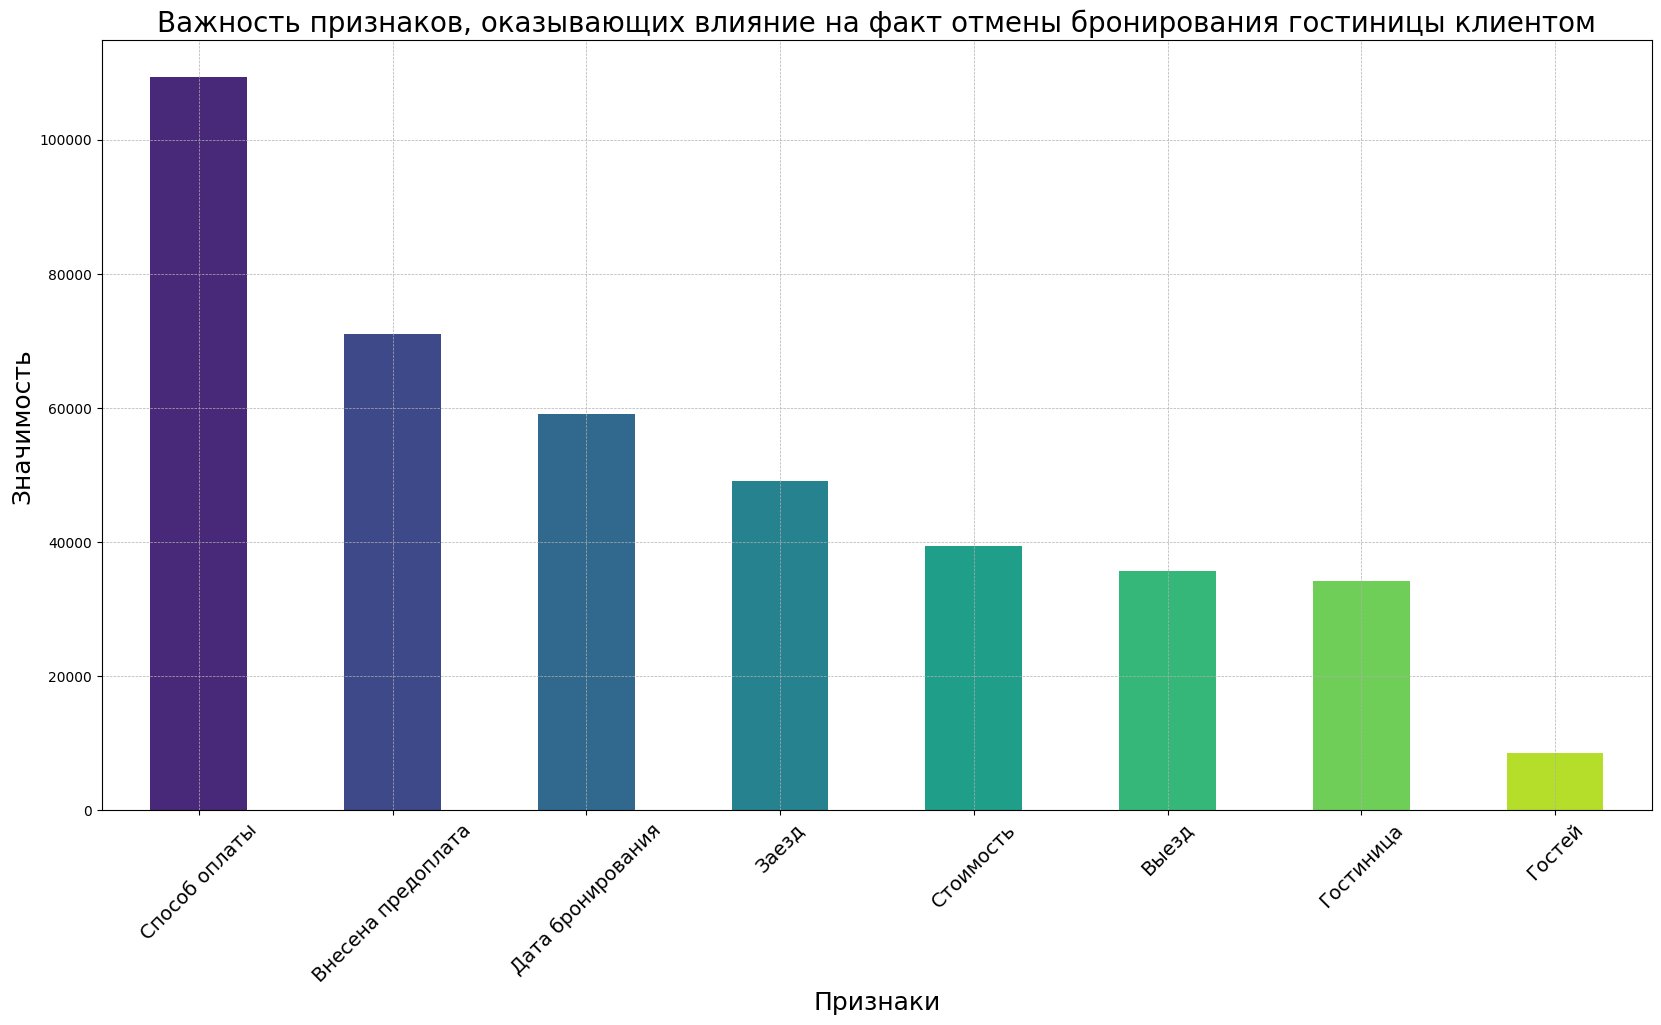

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'fi' is your DataFrame
fi = automl.get_feature_scores('fast')
fi.set_index('Feature', inplace=True)

# Create a color palette
palette = sns.color_palette("viridis", len(fi))

# Create the bar plot
plt.figure(figsize=(20, 10))
ax = fi['Importance'].plot(kind='bar', color=palette)

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add gradient fill
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(palette[i])

# Set title and labels with increased font size
plt.title('Важность признаков, оказывающих влияние на факт отмены бронирования гостиницы клиентом', fontsize=20)
plt.xlabel('Признаки', fontsize=18)
plt.ylabel('Значимость', fontsize=18)

# Increase the font size of the x-axis labels and rotate them by 45 degrees
plt.xticks(fontsize=14, rotation=45)

# Show the plot
plt.show()


## Вывод предсказанных значений

In [ ]:
%%time
preds = automl.predict(test_data)
print (f'Предсказанные значения {preds}')
preds = preds.data[:, 0]

Предсказанные значения array([[4.1486342e-03],
       [9.3122087e-03],
       [2.1166647e-05],
       ...,
       [1.5016248e-05],
       [1.0717428e-05],
       [9.6858430e-01]], dtype=float32)
CPU times: user 32 s, sys: 42.5 ms, total: 32.1 s
Wall time: 19.4 s


## Вывод метрик качества построенной модели

In [ ]:
y_test = test_data['Отмена'].values
res_1 = (preds >= 0.5).astype(int)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def calculate_classification_metrics(y_true, y_pred, y_prob, model_name):
    """
    Функция для подсчета метрик качества модели бинарной классификации, включая ROC AUC.

    Аргументы:
    y_true -- истинные значения целевой переменной
    y_pred -- предсказанные значения целевой переменной
    y_prob -- вероятности положительного класса
    model_name -- название модели

    Возвращает словарь с названиями метрик и их значениями.
    """
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_prob),
        'Confusion Matrix': confusion_matrix(y_true, y_pred).tolist()
    }

    return metrics


In [ ]:
# Теперь вызываем функцию, передавая три аргумента: y_test, res_1 и y_prob
metrics_1 = calculate_classification_metrics(y_test, res_1, preds, 'Model TabularAutoML')

# Выводим метрики
print("\nМетрики качества модели:")
for metric, value in metrics_1.items():
    print(f"{metric}: {value}")


Метрики качества модели:
Model: Model TabularAutoML
Accuracy: 0.976367552045944
Precision: 0.9866327180140039
Recall: 0.6590136054421769
F1 Score: 0.7902115727759369
ROC AUC: 0.9903773930660553
Confusion Matrix: [[32452, 21], [802, 1550]]


In [ ]:
data_1 = pd.read_excel('/content/drive/MyDrive/Datasets/test.xlsx')
data_1

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница
0,0,20231129-16563-238946689,1,23750.0,23750,Банк. карта: Банк Россия (банк. карта),2023-11-28 10:34:43,2023-11-29 15:00:00,2,2023-12-01 12:00:00,Официальный сайт,Номер «Студия»,3,4
1,1,20221219-7491-174959103,1,15010.0,7505,Банк. карта: Банк Россия (банк. карта),2022-12-12 18:30:43,2022-12-19 15:00:00,2,2022-12-21 12:00:00,Официальный сайт,Номер «Стандарт»,2,3
2,2,20221211-6634-172724329,1,8400.0,8400,Отложенная электронная оплата: Банк Россия (ба...,2022-11-25 22:03:59,2022-12-11 15:00:00,1,2022-12-12 12:00:00,Официальный сайт,Номер «Стандарт»,2,1
3,3,20230821-6634-212247350,1,42500.0,42500,Банк. карта: Банк Россия (банк. карта),2023-07-18 15:45:46,2023-08-21 15:00:00,3,2023-08-24 12:00:00,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1
4,4,20230326-6634-189784563,1,62500.0,11900,Система быстрых платежей: Эквайринг ComfortBoo...,2023-03-23 11:04:13,2023-03-26 15:00:00,5,2023-03-31 12:00:00,Официальный сайт,Номер «Стандарт»,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,11213,20220507-7492-130458541,1,50200.0,50200,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLin...,2022-03-27 21:30:38,2022-05-07 15:00:00,2,2022-05-09 12:00:00,Официальный сайт,Номер «Студия»,4,2
11214,11214,20240217-6634-235901857,1,190100.0,43500,Система быстрых платежей: Эквайринг ComfortBoo...,2023-11-11 17:51:55,2024-02-16 15:00:00,5,2024-02-21 12:00:00,Официальный сайт,Коттедж с 2 спальнями,4,1
11215,11215,20220209-6634-124107676,1,42300.0,42300,Банк. карта: Банк Россия (банк. карта),2022-02-09 02:23:14,2022-02-09 15:00:00,1,2022-02-10 12:00:00,Официальный сайт,Коттедж с 3 спальнями,5,1
11216,11216,20230128-6634-179977236,1,27900.0,27900,Банк. карта: Банк Россия (банк. карта),2023-01-21 09:10:17,2023-01-28 15:00:00,1,2023-01-29 12:00:00,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1


In [ ]:
data_1 = data_1.drop(columns=['Unnamed: 0', '№ брони', 'Номеров', 'Ночей', 'Источник', 'Категория номера'])

In [ ]:
data_1

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Выезд,Гостей,Гостиница
0,23750.0,23750,Банк. карта: Банк Россия (банк. карта),2023-11-28 10:34:43,2023-11-29 15:00:00,2023-12-01 12:00:00,3,4
1,15010.0,7505,Банк. карта: Банк Россия (банк. карта),2022-12-12 18:30:43,2022-12-19 15:00:00,2022-12-21 12:00:00,2,3
2,8400.0,8400,Отложенная электронная оплата: Банк Россия (ба...,2022-11-25 22:03:59,2022-12-11 15:00:00,2022-12-12 12:00:00,2,1
3,42500.0,42500,Банк. карта: Банк Россия (банк. карта),2023-07-18 15:45:46,2023-08-21 15:00:00,2023-08-24 12:00:00,4,1
4,62500.0,11900,Система быстрых платежей: Эквайринг ComfortBoo...,2023-03-23 11:04:13,2023-03-26 15:00:00,2023-03-31 12:00:00,1,1
...,...,...,...,...,...,...,...,...
11213,50200.0,50200,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLin...,2022-03-27 21:30:38,2022-05-07 15:00:00,2022-05-09 12:00:00,4,2
11214,190100.0,43500,Система быстрых платежей: Эквайринг ComfortBoo...,2023-11-11 17:51:55,2024-02-16 15:00:00,2024-02-21 12:00:00,4,1
11215,42300.0,42300,Банк. карта: Банк Россия (банк. карта),2022-02-09 02:23:14,2022-02-09 15:00:00,2022-02-10 12:00:00,5,1
11216,27900.0,27900,Банк. карта: Банк Россия (банк. карта),2023-01-21 09:10:17,2023-01-28 15:00:00,2023-01-29 12:00:00,4,1


In [ ]:
# Определить столбцы для кодирования
encode_cols = [col for col in data_1.columns if data_1[col].dtype == 'object']

# Кодирование остальных столбцов с типом object
for col in encode_cols:
    le = LabelEncoder()
    data_1[col] = le.fit_transform(data_1[col])

In [ ]:
data_1

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Выезд,Гостей,Гостиница
0,23750.0,23750,4,2023-11-28 10:34:43,2023-11-29 15:00:00,2023-12-01 12:00:00,3,4
1,15010.0,7505,4,2022-12-12 18:30:43,2022-12-19 15:00:00,2022-12-21 12:00:00,2,3
2,8400.0,8400,11,2022-11-25 22:03:59,2022-12-11 15:00:00,2022-12-12 12:00:00,2,1
3,42500.0,42500,4,2023-07-18 15:45:46,2023-08-21 15:00:00,2023-08-24 12:00:00,4,1
4,62500.0,11900,13,2023-03-23 11:04:13,2023-03-26 15:00:00,2023-03-31 12:00:00,1,1
...,...,...,...,...,...,...,...,...
11213,50200.0,50200,3,2022-03-27 21:30:38,2022-05-07 15:00:00,2022-05-09 12:00:00,4,2
11214,190100.0,43500,13,2023-11-11 17:51:55,2024-02-16 15:00:00,2024-02-21 12:00:00,4,1
11215,42300.0,42300,4,2022-02-09 02:23:14,2022-02-09 15:00:00,2022-02-10 12:00:00,5,1
11216,27900.0,27900,4,2023-01-21 09:10:17,2023-01-28 15:00:00,2023-01-29 12:00:00,4,1


In [ ]:
# Оставляем только дату и приводим к типу object
data_1['Дата бронирования'] = data_1['Дата бронирования'].dt.date.astype(str)
data_1['Заезд'] = data_1['Заезд'].dt.date.astype(str)
data_1['Выезд'] = data_1['Выезд'].dt.date.astype(str)

# Проверка изменений
print(data_1[['Дата бронирования', 'Заезд', 'Выезд']].dtypes)
print(data_1.head())

Дата бронирования    object
Заезд                object
Выезд                object
dtype: object
   Стоимость  Внесена предоплата  Способ оплаты Дата бронирования       Заезд  \
0    23750.0               23750              4        2023-11-28  2023-11-29   
1    15010.0                7505              4        2022-12-12  2022-12-19   
2     8400.0                8400             11        2022-11-25  2022-12-11   
3    42500.0               42500              4        2023-07-18  2023-08-21   
4    62500.0               11900             13        2023-03-23  2023-03-26   

        Выезд  Гостей  Гостиница  
0  2023-12-01       3          4  
1  2022-12-21       2          3  
2  2022-12-12       2          1  
3  2023-08-24       4          1  
4  2023-03-31       1          1  


In [ ]:
data_1

,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Выезд,Гостей,Гостиница
0,23750.0,23750,4,2023-11-28,2023-11-29,2023-12-01,3,4
1,15010.0,7505,4,2022-12-12,2022-12-19,2022-12-21,2,3
2,8400.0,8400,11,2022-11-25,2022-12-11,2022-12-12,2,1
3,42500.0,42500,4,2023-07-18,2023-08-21,2023-08-24,4,1
4,62500.0,11900,13,2023-03-23,2023-03-26,2023-03-31,1,1
...,...,...,...,...,...,...,...,...
11213,50200.0,50200,3,2022-03-27,2022-05-07,2022-05-09,4,2
11214,190100.0,43500,13,2023-11-11,2024-02-16,2024-02-21,4,1
11215,42300.0,42300,4,2022-02-09,2022-02-09,2022-02-10,5,1
11216,27900.0,27900,4,2023-01-21,2023-01-28,2023-01-29,4,1


In [ ]:
# Определить столбцы для кодирования
encode_cols = [col for col in data_1.columns if data_1[col].dtype == 'object']

# Кодирование остальных столбцов с типом object
for col in encode_cols:
    le = LabelEncoder()
    data_1[col] = le.fit_transform(data_1[col])

In [ ]:
%%time
preds = automl.predict(data_1)
print (f'Предсказанные значения {preds}')
preds = preds.data[:, 0]

Предсказанные значения array([[0.00840851],
       [0.0191793 ],
       [0.00537498],
       ...,
       [0.00412897],
       [0.00080137],
       [0.1384441 ]], dtype=float32)
CPU times: user 13.4 s, sys: 34.1 ms, total: 13.4 s
Wall time: 9.59 s


In [ ]:
preds

array([0.00840851, 0.0191793 , 0.00537498, ..., 0.00412897, 0.00080137,
       0.1384441 ], dtype=float32)

In [ ]:
res_final = (preds >= 0.5).astype(int)

In [ ]:
res_final

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
len(res_final)

11218

In [ ]:
# Create a DataFrame with the array as a single column
df = pd.DataFrame(res_final)

In [ ]:
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
11213,0
11214,0
11215,0
11216,0


In [ ]:
# Преобразуем predictions_binary в Pandas Series для использования value_counts()
predictions_binary_series = pd.Series(predictions)

# Подсчитываем количество каждого уникального значения
score_counts = predictions_binary_series.value_counts()

# Выводим уникальные значения и их количество
print(score_counts)

0    22189
1    19775
Name: target, dtype: int64


In [ ]:
df.to_csv('example_rty.csv', index=False, header=False)